$ \newcommand{\mbf}{\mathbf} $
$ \newcommand{\norm}[1]{\left\Vert#1\right\Vert} $
$ \newcommand{\abs}[1]{\left\vert#1\right\vert} $
$ \newcommand{\Rar}{\Longrightarrow} $
$ \newcommand{\Dar}{\Longleftrightarrow} $

# Métodos de Runge-Kutta

## $ \S 1 $ Introdução

Considere mais uma vez o problema de valor inicial vetorial de primeira ordem
\begin{equation*}\label{E:ivp}
\begin{cases}
\mbf y' = \mbf F(t, \mbf y) \\
\mbf y(t_0) = \mbf y_0
\end{cases}
\quad \text{onde} \quad \mbf y = \big(y_0, y_1, \dots, y_{r-1}\big)\,. \tag{1}
\end{equation*}

Um método de solução numérica é dito **de ordem $ m $** se para um tamanho de passo $ h $, o erro global envolvido está na classe $ O(h^m) $.

O *método de Taylor de ordem $ m $* do caderno anterior é, de fato, um método de ordem $ m $ neste sentido. Recorde que ele é baseado na aproximação de $ \mbf y(t+h) $ pelo polinômio de Taylor de ordem $ m $ de $ \mbf y $ ao redor de $ t $:
\begin{equation*}
\mbf y(t+h) \approx \mbf y(t) + h\,\mbf y'(t) + \frac{h^2}{2}\,\mbf y''(t) + \cdots + \frac{h^m}{m!}\mbf y^{(m)}(t)\,.
\end{equation*}
Como preço a pagar pela precisão adicional, precisamos obter as expressões para $ \mbf y'',\, \mbf y''', \cdots, \mbf y^{(m)} $ diferenciando repetidamente ambos os lados da equação diferencial $ \mbf y' = \mbf F(t,\mbf y) $ com respeito a $ t $.

Os *métodos de Runge-Kutta* também são baseados em aproximações por polinômios de Taylor, porém eles evitam o cálculo das derivadas de ordem mais alta de $ \mbf y $ de forma engenhosa.

## $ \S 2 $ Método de Runge-Kutta de segunda ordem

### $ 2.1 $ Idéia e obtenção do método

Suponha que $ \mbf y $ seja solução da equação diferencial em \eqref{E:ivp} e considere sua aproximação pelo polinômio de Taylor de ordem $ 2 $ ao redor de $ t $:
\begin{alignat*}{9}
\mbf y(t+h) &\approx \mbf y(t) + h\,\mbf y'(t) + \frac{h^2}{2}\,\mbf y''(t) \\
&= \mbf y(t) + h\,\mbf F\big(t,\mbf y(t)\big) + \frac{h^2}{2}\,\frac{d}{dt}\big[\mbf F\big(t,\mbf y(t)\big)\big] \\
&= \mbf y(t) + h\,\mbf F\big(t,\mbf y(t)\big) + \frac{h^2}{2}\,\Bigg(\frac{\partial \mbf F}{\partial t} + \sum_{k=0}^{r-1} \frac{\partial \mbf F}{\partial y_k}f_k \Bigg)\big(t,\mbf y(t)\big)\,.\label{E:Taylor2} \tag{2}
\end{alignat*}
No último passo usamos que $ \mbf y' = \mbf F(t,\mbf y) $ para substituir $ y_k' $ pela $ k $-ésima coordenada $ f_k $ de $ \mbf F $. O erro cometido nesta aproximação está em $ O(h^3) $.

Para obter o *método de Runge-Kutta geral de segunda ordem*, consideramos a expressão
\begin{equation*}\label{E:prelim}
\mbf y(t) + c_0\,h\,\mbf F\big(t,\,\mbf y(t)\big) + c_1\,h\,\mbf F \big(t + p\,h,\,\mbf y(t) + q\,h\,\mbf F\big(t,\mbf y(t)\big)\big) \tag{3}
\end{equation*}
e tentamos escolher os parâmetros $ c_0,\,c_1,\,p,\,q $ de modo que ela coincida com  \eqref{E:Taylor2} a menos de um resto em $ O(h^3) $.

Usando o polinômio de Taylor de $ \mbf F $ de ordem $ 1 $ em várias variáveis ao redor de $ (t,\mbf y) $, temos:
\begin{equation*}
    \mbf F \big(t + p\,h,\,\mbf y + q\,h\,\mbf F(t,\mbf y)\big) = \mbf F(t,\mbf y) + p\,h\,\frac{\partial \mbf F}{\partial t}\big(t,\mbf y\big) + q\,h\,\Bigg(\sum_{k=0}^{r-1}\frac{\partial \mbf F}{\partial y_k}f_k\Bigg)\big(t,\mbf y\big) + O(h^2)\,.
\end{equation*}
Substituindo esta relação em \eqref{E:prelim} e desconsiderando os termos em $ O(h^3) $, obtemos finalmente:
\begin{equation*}
\mbf y(t) + (c_0 + c_1)\,h\,\mbf F \big(t,\,\mbf y(t)\big) + \frac{h^2}{2}(2\,c_1\,p)\frac{\partial \mbf F}{\partial t}\big(t,\mbf y(t)\big)+ \frac{h^2}{2}(2\,c_1\,q)\Bigg(\sum_{k=0}^{r-1}\frac{\partial \mbf F}{\partial y_k}f_k\Bigg)\big(t,\mbf y(t)\big)\,.
\end{equation*}

Esta expressão coincide com aquela em \eqref{E:Taylor2} se e somente se:
\begin{equation*}\label{E:conditions}
\boxed{c_0 + c_1 = 1\,,\quad c_1 p = \frac{1}{2}\,, \quad c_1q = \frac{1}{2}}\tag{4}
\end{equation*}
Como estas são três equações em quatro parâmetros desconhecidos, temos um grau de liberdade para resolvê-las. As escolhas mais populares, juntamente com o nome do método resultante, estão tabeladas abaixo:

|    Valor de $ c_0 $   |    Valor de $ c_1 $   |    Valor de $ p $   |    Valor de $ q $   |         Nome do método         |
|:---------------------:|:---------------------:|:-------------------:|:-------------------:|:------------------------------:|
|      $ c_0 = 0 $      |      $ c_1 = 1 $      | $ p = \frac{1}{2} $ | $ q = \frac{1}{2} $ | **método de Euler modificado** |
| $ c_0 = \frac{1}{2} $ | $ c_1 = \frac{1}{2} $ |      $ p = 1 $      |      $ q = 1 $      |       **método de Heun**       |
| $ c_0 = \frac{1}{3} $ | $ c_1 = \frac{2}{3} $ | $ p = \frac{3}{4} $ | $ q = \frac{3}{4} $ |      **método de Ralston**     |

### $ 2.2 $ Fórmula do método de Runge-Kutta de ordem $ 2 $

Como nos outros métodos, sejam $ N \ge 1 $ um inteiro, $ h \ne 0 $ o tamanho do passo e 
$$
t_i = t_0 + ih \qquad (i = 0, 1, \dots, N)
$$
os nodos correspondentes.

No **método de Runge-Kutta de ordem 2** mais geral, partindo do valor conhecido $ \mbf y_0 = \mbf y(t_0) $, nos baseamos em \eqref{E:prelim} para tomar a aproximação $ \mbf y_i $ para $ \mbf y(t_i) $ dada por
\begin{equation*}\label{E:RK2}
    \boxed{\mbf y_i = \mbf y_{i-1} + c_0\,h\,\mbf F(t_{i-1}, \mbf y_{i-1})+ c_1\,h\,\mbf F \big(t_{i-1} + p\,h,\,\mbf y_{i-1} + q\,h\,\mbf F(t_{i-1},\mbf y_{i-1})\big)}
\end{equation*}
para $ i= 1, 2, \dots, N $ sucessivamente, onde $ c_0,\,c_1,\,p,\,q \in \mathbb R $ são constantes quaisquer satisfazendo \eqref{E:conditions}. 

📝 Independentemente da escolha destes parâmetros, o método correspondente é *de ordem 2*, ou seja, o erro *global* envolvido é aproximadamente proporcional a $ h^2 $. Portanto do ponto de vista da precisão eles são todos equivalentes ao método de Taylor de ordem $ 2 $. Entretanto eles têm a grande vantagem de não exigir o cálculo de qualquer derivada parcial de $ \mbf F $.

## $ \S 3 $ Implementação do método de Runge-Kutta de segunda ordem

In [2]:
def runge_kutta_2(c_0, c_1, p, q, F, t_0, Y_0, T, h):
    """
    Fornece uma solução numérica do problema de valor inicial
        Y' = F(t, Y),    Y(t_0) = Y_0
    usando o método de Runge-Kutta geral de ordem 2.
    Entradas:
        * Constantes (do tipo float) c_0, c_1, p e q satisfazendo
            c_0 + c_1 = 1,    c_1 p = c_2 q = 1 / 2.0
        * A função escalar ou vetorial F(t, Y) que define a EDO.
        * O instante inicial t_0.
        * Um array ou escalar Y_0 tal que Y(t_0) = Y_0 é a condição inicial.
        * O instante (nodo) T final.
        * O tamanho do passo h, que deve ter o mesmo sinal que T - t_0.
    Saídas:
        * Um array ts = [t_0, t_1, ..., t_N = T] onde t_i = t_0 + ih
          para i = 0, 1, ..., N - 1 e T - t_{N - 1} <= h.
        * Um array correspondente Ys = [Y_0, Y_1, ..., Y_N] contendo
          as aproximações para a solução analítica em t_i.
    """
    import numpy as np

    
    if (c_0 + c_1 != 1 or float(c_1 * p) != 1 / 2.0 or float(c_1 * q) != 1 / 2.0):
        raise ValueError("c_0, c_1, p e q não satisfazem as condições exigidas!")
    sinal = np.sign(h)
    assert np.sign(T - t_0) == sinal
    Y = np.array(Y_0)
    t = t_0
    ts = [t_0]
    Ys = [Y_0]
    
    # Enquanto não atingimos T, atualizamos Y = Y_i usando a fórmula
    # do método. Depois incrementamos (ou decrementamos) t por h.
    while sinal * (T - t) > 0:    # t < T (se h > 0) ou T < t (se h < 0)
        # Se falta menos que |h| para chegar em T, usamos um passo menor:
        h = sinal * min(abs(h), abs(T - t))
        termo_1 = c_0 * h * F(t, Y)
        termo_2 = c_1 * h * F(t + p * h, Y + q * h * F(t, Y))
        Y = Y + termo_1 + termo_2
        t = t + h
        Ys.append(Y)
        ts.append(t)
        
    return np.array(ts), np.array(Ys)

**Exemplo 1:**

(a) Use a sua solução do Problema 1 para implementar separadamente os métodos de Euler modificado, de Heun e de Ralston. *Dica:* Em cada caso, chame o método de Runge-Kutta de ordem $ 2 $ genérico com os valores correspondentes de $ c_0,\,c_1,\,p,\,q $.

(b) Usando o procedimento `compara_varias_solucoes` da $ \S 7 $, compare graficamente as soluções fornecidas pelos três métodos no intervalo $ [0, 20] $ com tamanho de passo $ h = 0.1 $ para o problema de valor inicial
$$
y' - y \cos t = \sqrt{t} \sin(2t), \quad y(1) = \tfrac{1}{2}\,.
$$
Você percebe alguma diferença entre as três soluções?

(c) Use o procedimento `imprime_solucao` para estimar $ y(20) $ usando cada um dos três métodos. Verifique que as aproximações são de fato diferentes, ainda que parecidas.

In [3]:
# Método de Euler modificado
def euler(F, t_0, Y_0, T, h):
    c_0 = 0
    c_1 = 1
    p = q = 1 / 2.0
    return runge_kutta_2(c_0, c_1, p, q, F, t_0, Y_0, T, h)

In [4]:
# Método de Heun
def heun(F, t_0, Y_0, T, h):
    c_0 = c_1 = 1 / 2.0 
    p = q = 1
    return runge_kutta_2(c_0, c_1, p, q, F, t_0, Y_0, T, h)

In [5]:
# Método de Ralston
def ralston(F, t_0, Y_0, T, h):
    c_0 = 1 / 3.0
    c_1 = 2 / 3.0
    p = q = 3 / 4.0
    return runge_kutta_2(c_0, c_1, p, q, F, t_0, Y_0, T, h)

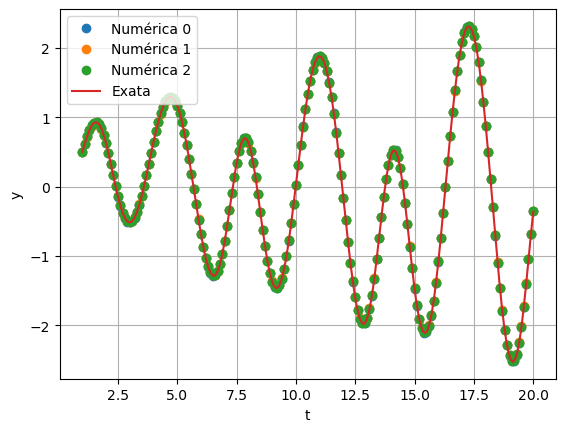


       t              y_0            
------------------------------
      1.00000        0.50000
     20.00000       -0.34981
------------------------------


       t              y_0            
------------------------------
      1.00000        0.50000
     20.00000       -0.34889
------------------------------


       t              y_0            
------------------------------
      1.00000        0.50000
     20.00000       -0.35077
------------------------------



In [16]:
import numpy as np

F = lambda t, y: y * np.cos(t) + np.sqrt(t) * np.sin(2 * t)
t_0 = 1
Y_0 = 1 / 2.0
h = 0.1
T = 20
ts, ys1 = euler(F, t_0, Y_0, T, h)
ts, ys2 = heun(F, t_0, Y_0, T, h)
ts, ys3 = ralston(F, t_0, Y_0, T, h)
yss = [ys1, ys2, ys3]
compara_varias_solucoes(F, t_0, Y_0, ts, yss)
for ys in yss:
    imprime_solucao(ts, ys, 0)
    print()

## $ \S 4 $ O método de Runge-Kutta de ordem $ 4 $

O método de Runge-Kutta de ordem $ 4 $ é o mais popular dentro da classe de métodos deste tipo. Ele é obtido a partir da aproximação de $ \mbf y $ por seu polinômio de Taylor de ordem $ 4 $ de maneira análoga àquela do método de ordem $ 2 $. Como a derivação da fórmula é trabalhosa e não muito instrutiva, ela não será explicada aqui. Novamente há liberdade na escolha dos parâmetros envolvidos, por isto a fórmula resultante não é única.

Na versão mais comum do **método de Runge-Kutta de ordem** $ 4 $, a aproximação $ \mbf y_i $ para $ \mbf y(t_i) $ é definida sucessivamente para $ i = 1, 2, \dots, N $ por
\begin{equation*}
    \boxed{\mbf y_i = \mbf y_{i-1} + \frac{h}{6} \big(\mbf k_1 + 2\,\mbf k_2 + 2\,\mbf k_3 + \mbf k_4 \big)}
\end{equation*}
onde
\begin{alignat*}{9}
    \mbf k_1 &= \mbf F\big(t_{i-1},\mbf y_{i-1}\big) \\
    \mbf k_2 &= \mbf F\Big(t_{i-1}+ \tfrac{h}{2},\mbf y_{i-1} + \tfrac{h}{2}\,\mbf k_1\Big) \\
    \mbf k_3 &= \mbf F\Big(t_{i-1}+ \tfrac{h}{2},\mbf y_{i-1} + \tfrac{h}{2}\,\mbf k_2\Big) \\
    \mbf k_4 &= \mbf F\big(t_{i-1}+h,\mbf y_{i-1} + h\,\mbf k_3\big)
\end{alignat*}

📝 A idéia geométrica por trás da fórmula é melhor entendida na situação em que o problema de valor inicial é escalar ($ r = 1 $). Neste caso o termo $ k_1 =  f(t_{i-1}, y_{i-1}) $ representa o declive da solução que vale $ y_{i-1} $ em $ t = t_{i-1} $. Ele é utilizado na expressão para $ k_2 $ para se obter uma estimativa do declive em $ t_{i-1} + \frac{h}{2} $. Então $ k_2 $ é utilizado na expressão para $k_3 $ para se obter uma nova estimativa do declive em $ t_{i-1} + \frac{h}{2} $. Finalmente usamos $ k_3 $ para estimar o declive em $ t_i = t_{i-1} + h $. Para aproximar o valor da solução no próximo nodo $ t_i $ tomamos uma média ponderada destes quatro declives (com maior peso dado às duas estimativas no ponto médio) e, supondo que a solução seja aproximadamente linear, andamos por $ h $ com esta inclinação.

**Problema 1:** Sejam $ f \colon [a, b] \to \mathbb R $ uma função contínua e $ \varphi $ uma primitiva qualquer de $ f $. Mostre que o método de Runge-Kutta de ordem $ 4 $ aplicado ao problema de valor inicial
$$
\begin{cases}
y' = f(t) \\
y(a) = \varphi(a)
\end{cases}
$$
com tamanho de passo $ h = b - a $ se reduz à regra de Simpson simples:
$$
\varphi(b) - \varphi(a) = \int_a^b f(t)\,dt \approx \frac{b-a}{6}\big[f(a) + 4f(m) + f(b)\big] \quad \text{onde} \quad m = \frac{a + b}{2}\,.
$$

## $ \S 5 $ Implementação do método de Runge-Kutta de quarta ordem

In [12]:
def runge_kutta_4(F, t_0, Y_0, T, h):
    """
    Fornece uma solução numérica do problema de valor inicial
        Y' = F(t, Y),    Y(t_0) = Y_0
    usando o método de Runge-Kutta de ordem 4.
    Entradas:
        * A função escalar ou vetorial F(t, Y) que define a EDO.
        * O instante inicial t_0.
        * Um array ou escalar Y_0 tal que Y(t_0) = Y_0 é a condição inicial.
        * O instante T final.
        * O tamanho do passo h (com mesmo sinal de T).
    Saídas:
        * Um array ts = [t_0, t_1, ..., t_N = T] onde t_i = t_0 + i * h
          para i = 0, 1, ..., N - 1 e T - t_{N - 1} <= h.
        * Um array correspondente Ys = [Y_0, Y_1, ..., Y_N] contendo
          as aproximações para a solução analítica em t_i.
    """
    import numpy as np
    
    
    sinal = np.sign(h)
    assert np.sign(T - t_0) == sinal
    Y = np.array(Y_0)
    t = t_0
    ts = [t_0]
    Ys = [Y_0]
    
    # Enquanto não atingimos T, atualizamos Y = Y_i usando a fórmula
    # do método. Depois incrementamos (ou decrementamos) t por h.
    while sinal * (T - t) > 0:    # t < T (se h > 0) ou T < t (se h < 0)
        # Se falta menos que |h| para chegar em T, usamos um passo menor:
        h = sinal * min(abs(h), abs(T - t))
        K_1 = F(t, Y)
        K_2 = F(t + h / 2.0, Y + h * K_1 / 2.0)
        K_3 = F(t + h / 2.0, Y + h * K_2 / 2.0)
        K_4 = F(t + h, Y + h * K_3)
        Y = Y + h * (K_1 + 2 * K_2 + 2 * K_3 + K_4) / 6.0
        t += h
        Ys.append(Y)
        ts.append(t)
        
    return np.array(ts), np.array(Ys)

## $ \S 6 $ Problemas

**Problema 2:** 

(a) Integre o problema de valor inicial
$$
y' = -\sin y, \quad y(0) = 1
$$
no intervalo $ [-2\pi, 0] $ em passos de tamanho $ h = -0.1 $ para estimar $ y(-2\pi) $.

(b) A solução analítica não deveria ser $ \varphi (t) = \cos t $? Justifique, em face do resultado que se obtém por meio do procedimento `compara_solucao`.

*Solução:*

**Problema 3:** Considere o problema de valor inicial de primeira ordem
$$
\begin{cases}
y' = 3y - 4e^{-x} \\
y(0) = 1
\end{cases}
$$

(a) Verifique que a solução analítica é $ \varphi(x) = e^{-x} $.

(b) Use o método de Runge-Kutta de ordem $ 4 $ para integrar numericamente o PVI de $ t = 0 $ até $ T = 5 $ com passos de tamanho $ h = 0.1 $. Compare o valor da solução analítica e da solução numérica em $ T = 5 $.

(c) Verifique que a solução *geral* da EDO acima é $ y(t) = Ce^{3t} + e^{-t} $. Verifique também que se a condição inicial é $ y(0) = 1 + \varepsilon $, então a solução analítica é $ \varphi(t) = \varepsilon e^{3t} + e^{-t} $.

A discrepância verificada no item (b) pode ser explicada notando-se que os pequenos erros envolvidos na solução numérica têm o mesmo efeito que uma pequena variação da condição inicial, o que gera uma instabilidade numérica pelo surgimento do termo envolvendo $ e^{3t} $.

*Solução:*

**Problema 4:** Considere o problema de valor inicial de segunda ordem
$$
x^2 y'' + xy' + y = 0 \,, \quad y(1) = 0\,, \quad y'(1) = -2\,.
$$

(a) Transforme-o num problema de valor inicial da forma 
\begin{equation*}
\begin{cases}
\mbf y' = \mbf F(x, \mbf y) \\
\mbf y(x_0) = \mbf y_0
\end{cases}
\end{equation*}

(b) Obtenha a solução de $ x = 1 $ até $ 20 $ usando o método de Runge-Kutta de quarta ordem.

(b) Plote $ y $ e $ y' $ versus $ x $ neste intervalo. *Dica:* Recorde que $ \mbf y = (y_0, y_1) = (y, y') $. O procedimento `compara_solucao` consegue imprimir ambas as coordenadas no mesmo diagrama caso a última entrada fornecida seja o array `Ys` produzido pela implementação método de Runge-Kutta.

*Solução:*

**Problema 5:** Considere o problema de valor inicial
$$
y'' = -0.1\,y' - t\,, \quad y(0) = 0\,, \quad y'(0) = 1.
$$

(a) Transforme-o num problema de valor inicial da forma 
\begin{equation*}
\begin{cases}
\mbf y' = \mbf F(t, \mbf y) \\
\mbf y(t_0) = \mbf y_0
\end{cases}
\end{equation*}

(b) Resolva numericamente o PVI no intervalo $ [0, 2.4] $ usando o método de Runge-Kutta de ordem $ 4 $ com tamanho do passo $ h = 0.2 $.

(c) Plote a solução numérica juntamente com a solução analítica
$$
y(t) = 100t - 5t^2 + 990(e^{-0.1t} - 1)
$$
e com a solução obtida pelo método de Euler modificado (com mesmo tamanho de passo).

*Solução:*

## $ \S 7 $ Procedimentos para impressão e plotagem da solução numérica

📝 Além dos procedimentos utilizados no caderno anterior, adicionamos abaixo um novo procedimento `compara_varias_solucoes` para a plotagem simultânea de mais de uma solução numérica além da solução "exata". As entradas são as mesmas que para o procedimento `compara_solucao`, exceto que em vez de um único array `ys`, é preciso fornecer uma *lista* `yss` de arrays em que cada elemento representa uma solução numérica diferente. Todos estes elementos devem ter o mesmo comprimento que o do array `ts` dos nodos.

In [7]:
def imprime_solucao(ts, Ys, freq):
    """
    Dados dois arrays ts e Ys de mesmo comprimento, imprime um
    a cada 'freq' de seus valores por linha, na forma de uma
    tabela. Os 0-ésimos e últimos valores sempre são impressos.
    """
    def imprime_cabecalho(r):
        """
        Imprime o cabeçalho da tabela.
        """
        print("\n       t              ", end="")
        for j in range(r):
            print(f"y_{j}            ", end="")
        print()
        for j in range(r + 1):
            print("---------------", end="")
        print()
        
        
    def imprime_linha(t, Y, r):
        """
        Imprime uma das linhas da tabela.
        """
        print("{:13.5f}".format(t), end="")
        # Para dimensão r > 1:
        if r > 1:
            for j in range(r):
                print("  {:13.5f}".format(Y[j]), end="")
            print()
        # Para dimensão r = 1:
        else:
            print("  {:13.5f}".format(Y))
    
    N = len(Ys) - 1        # N + 1 é o número de nodos; N o de passos.
    try:
        r = len(Ys[0])     # Dimensão de cada entrada Y de Ys.
    except TypeError:
        r = 1
    if freq == 0:          # Se freq == 0, imprime apenas os últimos valores.
        freq = N
    imprime_cabecalho(r)
    for i in range(0, N + 1, freq):
        imprime_linha(ts[i], Ys[i], r)
    if i != N:
        imprime_linha(ts[N], Ys[N], r)
    for j in range(r + 1):
            print("---------------", end="")
    print()
        
    return None

In [8]:
def compara_solucao(f, t_0, y_0, ts, ys):
    """ Representa graficamente as seguintes soluções do PVI (escalar)
            y' = f(t, y), y(t_0) = y_0
    (1) Uma solução numérica dada pelos dois arrays (ou listas)
        ts e ys, calculada previamente por um método qualquer.
    (2) A solução obtida pela rotina `odeint` da biblioteca SciPy.
    Entradas:
        * A função escalar f(t, y) que define a EDO.
        * O instante inicial t_0.
        * O escalar y_0 tal que y(t_0) = y_0 é a condição inicial.
        * A lista ts dos nodos t_i.
        * A lista ys das aproximações y_i obtidas.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.integrate import odeint
    
    
    ts_exata = np.linspace(t_0, T, num=201)
    ys_exata = odeint(f, y_0, ts_exata, tfirst=True)
    
    plt.plot(ts, ys, 'o')
    plt.plot(ts_exata, ys_exata, '-')
    plt.grid(True)
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend(("Numérica", "Exata"), loc=0)
    plt.show()
    
    return None

In [9]:
def compara_varias_solucoes(f, t_0, y_0, ts, yss):
    """ Dado o PVI (escalar)
            y' = f(t, y),    y(t_0) = y_0
        representa graficamente:
    (1) Uma lista de soluções numéricas calculadas previamente
        pelo usuário por métodos quaisquer.
    (2) A solução obtida pela rotina `odeint` da biblioteca SciPy.
    Entradas:
        * A função escalar f(t, y) que define a EDO.
        * O instante inicial t_0.
        * O escalar y_0 tal que y(t_0) = y_0 é a condição inicial.
        * A lista ts dos nodos t_i.
        * Uma lista yss em que yss[k] é um array contendo a
          k-ésima solução numérica (correspondente aos nodos t_i).
    """
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.integrate import odeint
    
    N = len(yss[0]) - 1
    i = 0
    for ys in yss:
        if len(ys) != N + 1:
            raise ValueError("As listas ys devem ter o mesmo comprimento!")
        plt.plot(ts, ys, 'o', label=f'Numérica {i}')
        i += 1
    
    ts_exata = np.linspace(t_0, T, num=201)
    ys_exata = odeint(f, y_0, ts_exata, tfirst=True)
    plt.plot(ts_exata, ys_exata, '-', label='Exata')
    
    plt.grid(True)
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend(loc="upper left")
    plt.show()
    
    return None